# NSL Notebook 02

In [1]:
from default import *

## Exercise 02.1

Calculate the same integral:

$$ I = \int_0^1 dx\,\frac{\pi}{2}\,\cos(\pi\,x/2) = 1$$

using MC method with bocking method for compute uncertainties with:
* uniform distribution as integrad
* **important sampling** (no uniform pdf)

theoretically with important sampling the uncertainties should be smaller than using uniform distribution.

For important sampling a second-order expansion of orginal integrand has been used as pdf:

$$ \mathcal{pdf}(x) = \left[ 1 - \frac{1}{6}\,\left(\dfrac{\pi}{2} \right)^2 \right]^{-1}* \left[ 1 - \frac{1}{2}\,\left(\dfrac{\pi\,x}{2} \right)^2 \right] $$

the first term is the normalization costant within the interval $[0,\,1]$

For computation of MC integration have been used $M=10^6$ and $N=100$


As shown in figures below, with **IS** a little improvement has been reached for uncertainties, but this have caused a little offset from the real integral result.

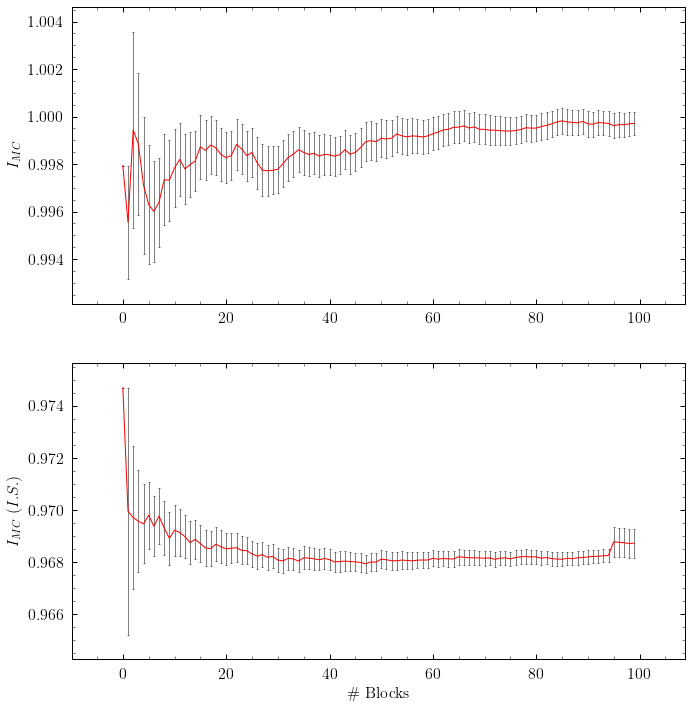

In [3]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(11,12))

# load MC integral results
df1 = pd.read_csv("I1-blk.csv", header=None, names=["mean","mean_err"])
df1["mean"].plot.line(yerr=df1["mean_err"], 
                      color='r', 
                      ecolor='gray', 
                      capthick=0.5, 
                      ax=ax1)

# load MC integral results, important sampling
df2 = pd.read_csv("I2-blk.csv", header=None, names=["var","var_err"])
df2["var"].plot.line(yerr=df2["var_err"], 
                     color='r', 
                     ecolor='gray', 
                     capthick=0.5, 
                     ax=ax2)

ax1.set_ylabel("$I_{MC}$");

ax2.set_xlabel("\# Blocks");
ax2.set_ylabel("$I_{MC}\;(I.S.)$");

## Exercise 02.2

The purpose for this exercise is to show that both discrete and continuum random walk are characterized by a mean square distance $\langle r^2 \rangle \propto N$

So the characteristic distance for a RWalker grows with the square of the step he make, it's not a linear motion were $s = vt$ is somethig different where $s=\sqrt{D}\,t^{1/2}$, it's call **diffusion motion** and $D$ is the **diffusion coefficient**

What I obtain simulating $1000$ RWs (discrete and continuum) with $N_{step}=100$, is the correct diffusion behaviour, with a deviation of mean square distance that increase with steps, beacause RWs can follow different paths more and more the steps increase.

With the fitting functions that exhibit a law:

* $0.98\,\sqrt{N}$ for discrete RW
* $1.03\,\sqrt{N}$ for continuum RW


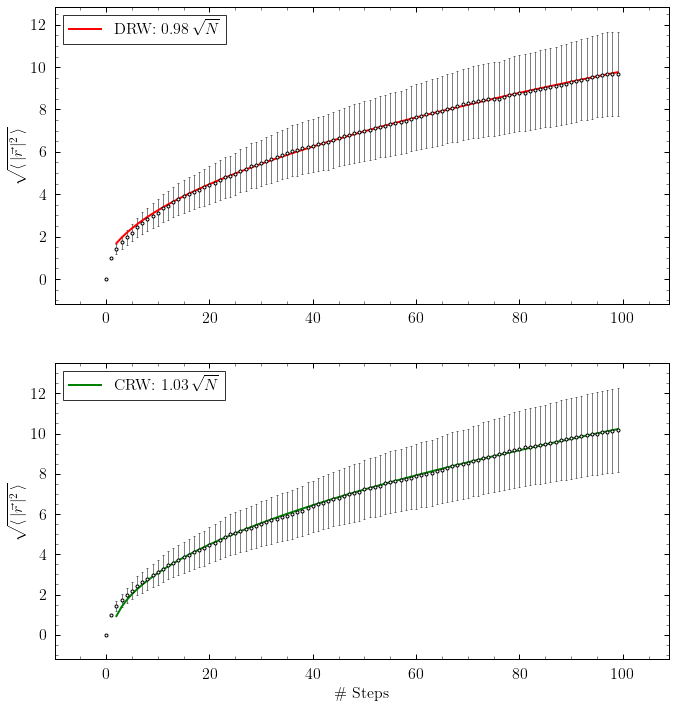

In [4]:
def fit(df, name):
    "polynomial fit of given dataframe, return fitting curve as dataframe"
    p = np.polyfit(df.index, df["mean"]**2, 1)
    v = np.polyval(p, df.index[2:])**(0.5)
    a = np.round(np.sqrt(p[0]),2)
    dfit = pd.DataFrame(v, index=df.index[2:], columns=[name+str(a)+"$\,\sqrt{N}$"])
    return dfit


fig, (ax1, ax2) = plt.subplots(2,1, figsize=(11,12))

# plot continuum RW
dfD_mean = pd.read_csv("DRW_mean.out", header=None, names=["mean"])
dfD_err = pd.read_csv("DRW_dev.out", header=None, names=["dev"])

dfD_mean["mean"].plot.line(ls='', 
                           yerr=dfD_err["dev"], 
                           marker='.', 
                           mfc='w', 
                           ecolor='gray', 
                           capthick=0.5, ax=ax1);

# fit discrete RW
fit(dfD_mean, "DRW: ").plot.line(color='r', lw=2, ax=ax1);

# plot continuum RW
dfC_mean = pd.read_csv("CRW_mean.out", header=None, names=["mean"])
dfC_err = pd.read_csv("CRW_dev.out", header=None, names=["dev"])

dfC_mean["mean"].plot.line(ls='', 
                           yerr=dfC_err["dev"], 
                           marker='.', 
                           mfc='w', 
                           ecolor='gray', 
                           capthick=0.5, 
                           ax=ax2);

# fit continuum RW
fit(dfC_mean, "CRW: ").plot.line(color='g', lw=2, ax=ax2);

ax1.set_ylabel("$\sqrt{\langle\,|\\vec{r}\,|^2\,\\rangle}$");
ax2.set_xlabel("\# Steps");
ax2.set_ylabel("$\sqrt{\langle\,|\\vec{r}\,|^2\,\\rangle}$");